In [1]:
pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


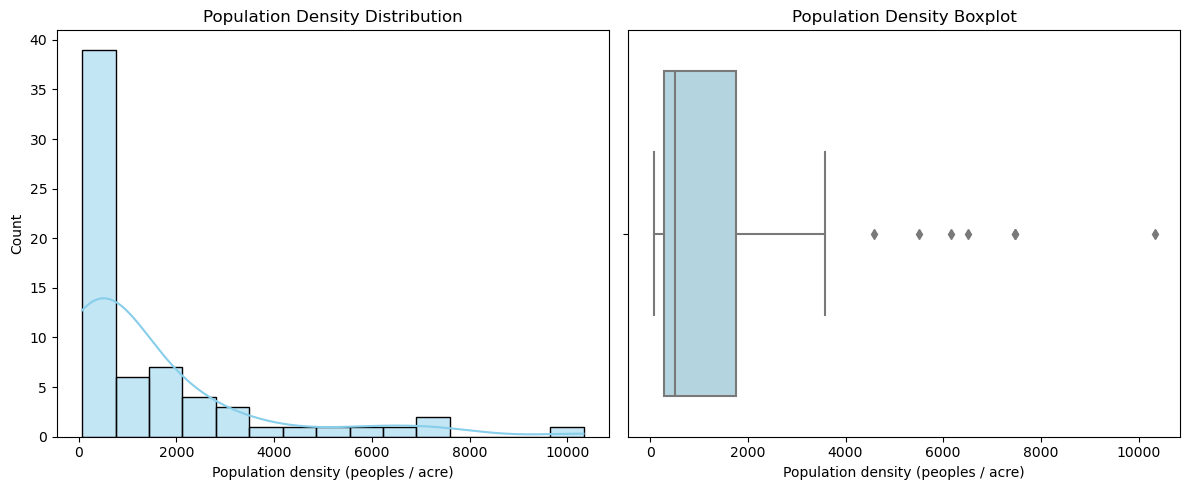

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load your CSV file
file_path = 'Data/Nairobi_SDI_slum_information_summary.csv'
df = pd.read_csv(file_path)

# Clean the data by removing NaN values from the 'Population density (peoples / acre)' column
df_clean = df.dropna(subset=['Population density (peoples / acre)'])

# Convert the 'Population density (peoples / acre)' column to numeric type
df_clean['Population density (peoples / acre)'] = pd.to_numeric(df_clean['Population density (peoples / acre)'], errors='coerce')

# Create distribution plot and boxplot
plt.figure(figsize=(12, 5))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(df_clean['Population density (peoples / acre)'], kde=True, color='skyblue')
plt.title('Population Density Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['Population density (peoples / acre)'], color='lightblue')
plt.title('Population Density Boxplot')

plt.tight_layout()
plt.show()


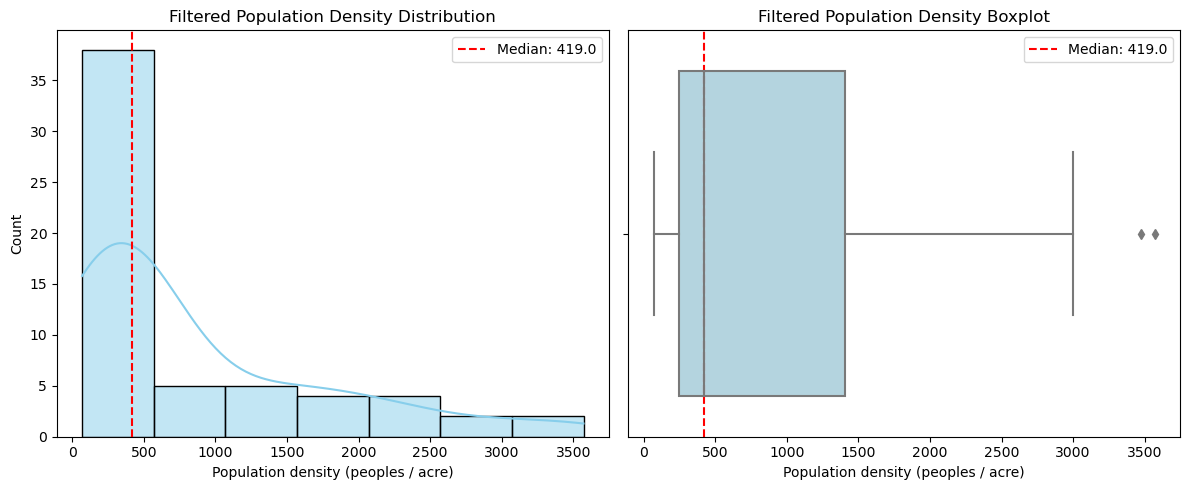

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Clean the data by removing NaN values from the 'Population density (peoples / acre)' column
df_clean = df.dropna(subset=['Population density (peoples / acre)'])

# Convert the 'Population density (peoples / acre)' column to numeric type
df_clean['Population density (peoples / acre)'] = pd.to_numeric(df_clean['Population density (peoples / acre)'], errors='coerce')

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_clean['Population density (peoples / acre)'].quantile(0.25)
Q3 = df_clean['Population density (peoples / acre)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df_clean[(df_clean['Population density (peoples / acre)'] >= lower_bound) & 
                          (df_clean['Population density (peoples / acre)'] <= upper_bound)]

# Calculate the median after removing outliers
median_value = df_filtered['Population density (peoples / acre)'].median()

# Create distribution plot and boxplot
plt.figure(figsize=(12, 5))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(df_no_outliers['Population density (peoples / acre)'], kde=True, color='skyblue')
plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value}')
plt.title('Filtered Population Density Distribution')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['Population density (peoples / acre)'], color='lightblue')
plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value}')
plt.title('Filtered Population Density Boxplot')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
# Given values
acre_to_sqm = 4046.86  # Area of 1 acre (in square meters)
density = median_value  # Population density (people/acre), using the median value calculated

# Calculate per capita area
per_capita_area = acre_to_sqm / density
print(f"Per capita area: {per_capita_area} square meters/person")


Per capita area: 9.658377088305489 square meters/person


### 当数据分布对称且没有极端值时，平均数是更好的中心趋势度量，然而像在这里的情况，数据集中存在极端值或分布不对称，中位数能够更好地反映数据的典型情况。

以下是一些关于何时使用中位数或平均数的文献和权威资源，您可以引用它们来支持您的结论：

1. **"The Elements of Statistical Learning" by Trevor Hastie, Robert Tibshirani, and Jerome Friedman (2009)**
   - **引用**: Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. Springer.
   - **内容**: 这本书讨论了不同统计量的优缺点，特别是在数据分析和机器学习中的应用，指出中位数在存在异常值时比平均数更具稳健性。

2. **"Statistical Methods for Psychology" by David C. Howell (2012)**
   - **引用**: Howell, D. C. (2012). *Statistical Methods for Psychology* (8th ed.). Wadsworth.
   - **内容**: Howell 在书中详细讨论了平均数和中位数的使用场景，指出在有异常值或非对称分布的情况下，中位数通常是更合适的测度。

3. **"Applied Multivariate Statistical Analysis" by Richard A. Johnson and Dean W. Wichern (2014)**
   - **引用**: Johnson, R. A., & Wichern, D. W. (2014). *Applied Multivariate Statistical Analysis* (6th ed.). Pearson.
   - **内容**: 该书讨论了在多元统计分析中的各种中心趋势测度，强调了中位数在处理异常值或分布偏斜数据时的优势。

4. **"Introduction to the Practice of Statistics" by David S. Moore, George P. McCabe, and Bruce A. Craig (2017)**
   - **引用**: Moore, D. S., McCabe, G. P., & Craig, B. A. (2017). *Introduction to the Practice of Statistics* (9th ed.). W.H. Freeman.
   - **内容**: 本书介绍了基本的统计学概念，包括何时使用中位数或平均数，建议在存在极端值的情况下使用中位数。
